# 1. Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, classification_report, f1_score
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

# 2. Carga del dataset original

In [2]:
#ya no es necesario ejecutar este codigo porque adjunto fichero con columnas reducidas "adult22_reducido"
# raw_data = pd.read_csv("adult22.csv")

In [3]:
# raw_data.shape

# 3. Elección de las columnas según el objetivo

El proceso de selecion se describe en pdf del actividad

In [4]:
# selected_columns=['DIBEV_A', 'SEX_A', 'AGEP_A', 'RACEALLP_A', 'URBRRL', 'HYPEV_A',
#        'CHLEV_A', 'FGEFRQTRD_A', 'VISIONDF_A', 'CHDEV_A', 'COPDEV_A', 'MIEV_A',
#        'CANEV_A', 'ARTHEV_A', 'DEPEV_A', 'WEIGHTLBTC_A', 'HEIGHTTC_A',
#        'MODFREQW_A', 'VIGFREQW_A', 'SODANO_A', 'SODATP_A', 'COFFEENO_A',
#        'COFFEENOTP_A', 'MARITAL_A']

In [5]:
# data=raw_data[selected_columns].copy()

In [6]:
# data.to_csv("adult22_reducido.csv",index=False)

In [7]:
dfDiab=pd.read_csv("adult22_reducido.csv")
dfDiab.head(3)

,DIBEV_A,SEX_A,AGEP_A,RACEALLP_A,URBRRL,HYPEV_A,CHLEV_A,FGEFRQTRD_A,VISIONDF_A,CHDEV_A,...,DEPEV_A,WEIGHTLBTC_A,HEIGHTTC_A,MODFREQW_A,VIGFREQW_A,SODANO_A,SODATP_A,COFFEENO_A,COFFEENOTP_A,MARITAL_A
0,2,1,85,1,2,1,2,1,1,2,...,2,148,68,3,94,3,2,0,0,3
1,2,1,64,1,4,1,1,2,1,1,...,2,235,74,7,1,3,2,3,2,1
2,1,2,37,1,4,2,2,2,1,2,...,2,218,69,7,3,0,0,7,2,1


In [8]:
dfDiab.tail(3)

,DIBEV_A,SEX_A,AGEP_A,RACEALLP_A,URBRRL,HYPEV_A,CHLEV_A,FGEFRQTRD_A,VISIONDF_A,CHDEV_A,...,DEPEV_A,WEIGHTLBTC_A,HEIGHTTC_A,MODFREQW_A,VIGFREQW_A,SODANO_A,SODATP_A,COFFEENO_A,COFFEENOTP_A,MARITAL_A
27648,2,2,69,1,4,2,1,1,1,2,...,2,125,60,94,94,1,3,0,0,1
27649,2,1,30,1,4,2,1,2,1,2,...,2,250,75,3,1,2,1,0,0,1
27650,2,1,51,1,4,2,1,1,1,2,...,2,220,76,5,94,2,1,0,0,1


In [9]:
dfDiab.shape

(27651, 24)

#4.  Preprocesamiento según la documentación del dataset.

Realizamos antes de división del dataset, porque son cambios según la documentación.

Eliminamos los registros con valores nulos en la columna con target “Diabetis” (7 y 9 significan "sin respuesta").

In [10]:
dfDiab["DIBEV_A"].replace({7 : np.NaN, 9 : np.NaN},inplace=True)
dfDiab.dropna(subset="DIBEV_A",inplace=True)

En nuestro target "DIBEV_A"(diabetis) la etiqueta 2 significa ausencia de enfermedad y 1 su presencia, reemplazamos 2 por 0 para facilitar la comprensión. Lo mismo para columnas con otras enfermedades.

In [11]:
colum_reempl=["DIBEV_A","HYPEV_A","CHDEV_A","CHLEV_A","COPDEV_A","MIEV_A","CANEV_A","ARTHEV_A","DEPEV_A"]
for column in colum_reempl:
  dfDiab[column].replace(2, 0, inplace=True)

Convertimos HEIGHTTC_A(altura) al metros, ahora está en inches. y WEIGHTLBTC_A(peso) al kg, ahora está en libras. Esto nos facilitará la comprensión de valores atípicos.

In [12]:
dfDiab["HEIGHTTC_A"] = dfDiab["HEIGHTTC_A"]*0.0254
dfDiab["WEIGHTLBTC_A"] = dfDiab["WEIGHTLBTC_A"]*0.453592

Renombramos las columnas.

In [13]:
dfDiab.columns

Index(['DIBEV_A', 'SEX_A', 'AGEP_A', 'RACEALLP_A', 'URBRRL', 'HYPEV_A',
       'CHLEV_A', 'FGEFRQTRD_A', 'VISIONDF_A', 'CHDEV_A', 'COPDEV_A', 'MIEV_A',
       'CANEV_A', 'ARTHEV_A', 'DEPEV_A', 'WEIGHTLBTC_A', 'HEIGHTTC_A',
       'MODFREQW_A', 'VIGFREQW_A', 'SODANO_A', 'SODATP_A', 'COFFEENO_A',
       'COFFEENOTP_A', 'MARITAL_A'],
      dtype='object')

In [14]:
nombres=['Diabetis', 'Genero', 'Edad', 'Raza', 'UrbanRural', 'Hipertens','Colest', 'CansadoFreq', 'MalVistaFreq',
 'EnfCoronaria', 'EnfBronquitCron', 'EnfInfarto','EnfCancer', 'EnfArtritis', 'EnfDepres', 'Peso', 'Altura',
 'ActividadModSeml', 'ActividadIntenSem', 'RefrescFreq', 'RefrescPeriod', 'CafeFreq','CafePeriod', 'EstadoCivil']

In [15]:
dfDiab.columns=nombres

In [16]:
dfDiab.head(3)

,Diabetis,Genero,Edad,Raza,UrbanRural,Hipertens,Colest,CansadoFreq,MalVistaFreq,EnfCoronaria,...,EnfDepres,Peso,Altura,ActividadModSeml,ActividadIntenSem,RefrescFreq,RefrescPeriod,CafeFreq,CafePeriod,EstadoCivil
0,0.0,1,85,1,2,1,0,1,1,0,...,0,67.131616,1.7272,3,94,3,2,0,0,3
1,0.0,1,64,1,4,1,1,2,1,1,...,0,106.594120,1.8796,7,1,3,2,3,2,1
2,1.0,2,37,1,4,0,0,2,1,0,...,0,98.883056,1.7526,7,3,0,0,7,2,1


# 5. Creación de los conjuntos de entrenamiento (train) y test.

 Usamos el método train_test_split con parámetro “stratify” según la columna target. Esto garantiza que ambas particiones tengan una proporción similar de las clases originales.

In [17]:
df_train, df_test = train_test_split(dfDiab,stratify=dfDiab['Diabetis'], test_size=0.3, random_state=42)

# 6. Selección, preprocesamiento y transformación

## 6.1. Detección de tipos de datos

Nuestra variable target "Diabetis" es categórica con etiquetas numéricas: 1 significa presencia de diabetis y 0 ausencia.

Los atributos se dividen en 2 grupos:
-	categóricos de tipo integer (por ejemplo Genero con valores 1 para los hombres y 2 para mujeres.
-	numéricos de tipo integer o float (ejemplo Edad)).

**Conclusión:** no necesitamos realizar la conversión de tipos de datos. La cantidad de categorías diferentes por cada variable categórica comprobaremos más adelante para decidir si vamos a usar OneHotEncoder o no.



In [18]:
df_train.dtypes

Diabetis             float64
Genero                 int64
Edad                   int64
Raza                   int64
UrbanRural             int64
Hipertens              int64
Colest                 int64
CansadoFreq            int64
MalVistaFreq           int64
EnfCoronaria           int64
EnfBronquitCron        int64
EnfInfarto             int64
EnfCancer              int64
EnfArtritis            int64
EnfDepres              int64
Peso                 float64
Altura               float64
ActividadModSeml       int64
ActividadIntenSem      int64
RefrescFreq            int64
RefrescPeriod          int64
CafeFreq               int64
CafePeriod             int64
EstadoCivil            int64
dtype: object

Lista de Variables categoricas + target

In [19]:
variables_categoricas=["Diabetis","Genero","UrbanRural","EstadoCivil","Raza","Hipertens","Colest","CansadoFreq","MalVistaFreq",
                       'EnfCoronaria', 'EnfBronquitCron', 'EnfInfarto', 'EnfCancer', 'EnfArtritis','EnfDepres',"RefrescPeriod",
                       "CafePeriod"]

Lista de Variables numericas.

In [20]:
variables_numericas=list( set(df_train.columns)-set(variables_categoricas))
variables_numericas

['Peso',
 'CafeFreq',
 'Edad',
 'RefrescFreq',
 'ActividadModSeml',
 'ActividadIntenSem',
 'Altura']

## 6.2 Análisis univariante

Construimos los gráficos para cada columna para comprender mejor los datos y planear los pasos de procesamoento y transformacion.
**Conclusion:** Se ve que para muchas variables hay outliers a la derecha,atributos tienen diferentes tipos de rangos y distribuciones,  target esta desbalanceada.

### 6.2.1 Variables categoricas + target

Para atributos categoricos normalmente se usa grafico de barras, pero para simplificar el codigo uso hist() con ancho de bin equivalente a 1 para todos.

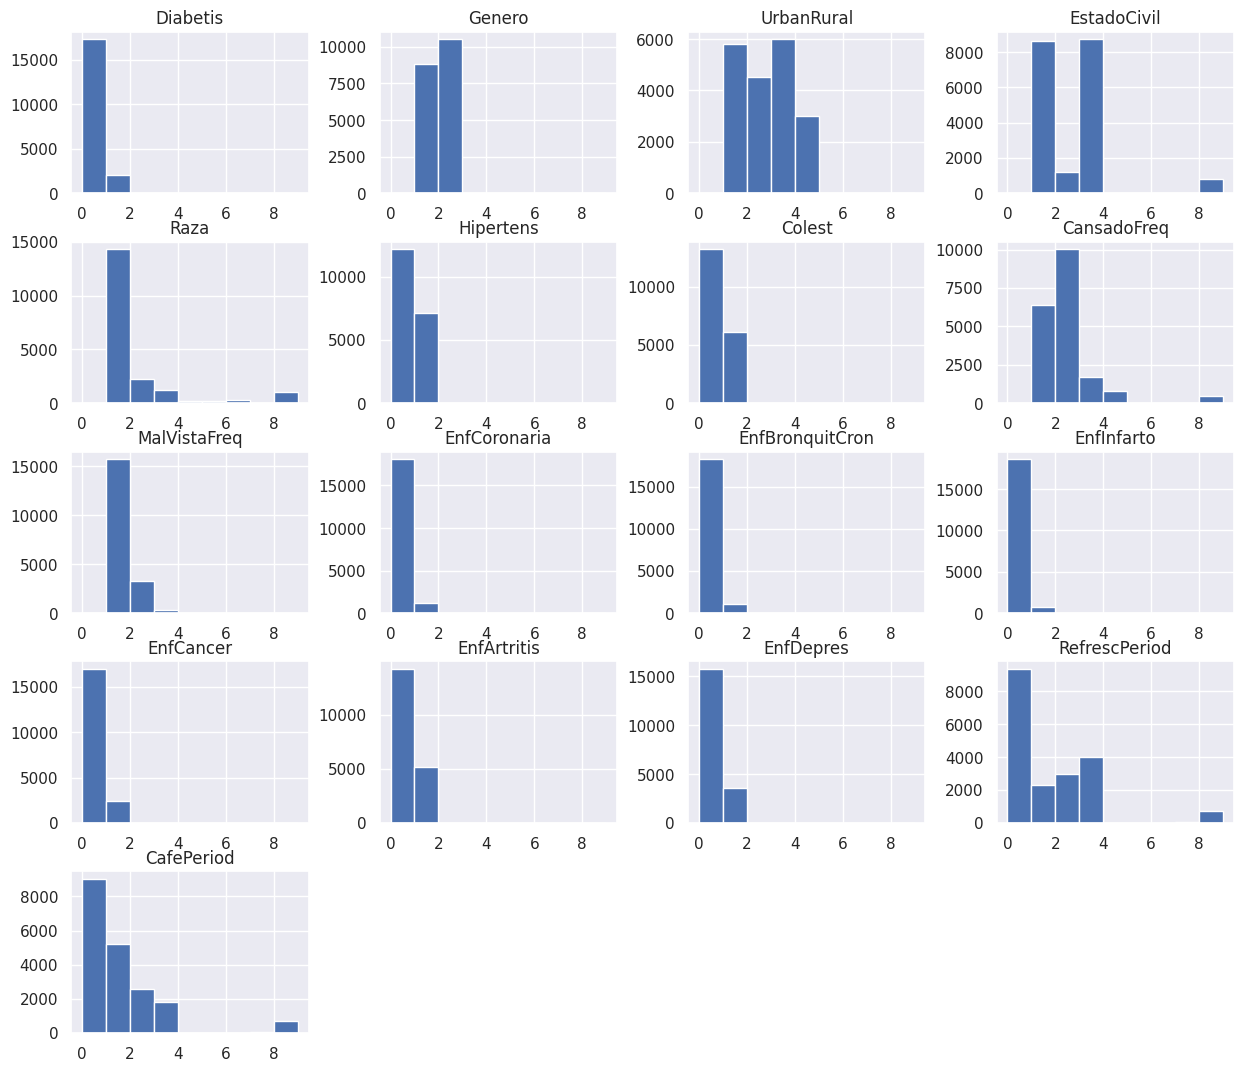

In [21]:
binwidth=1
df_train[variables_categoricas].hist(bins=np.arange(min(df_train[variables_categoricas].min()), max(df_train[variables_categoricas].max()) + binwidth, binwidth), figsize=(15, 13))
plt.show()

### 6.2.2 Variables numericas

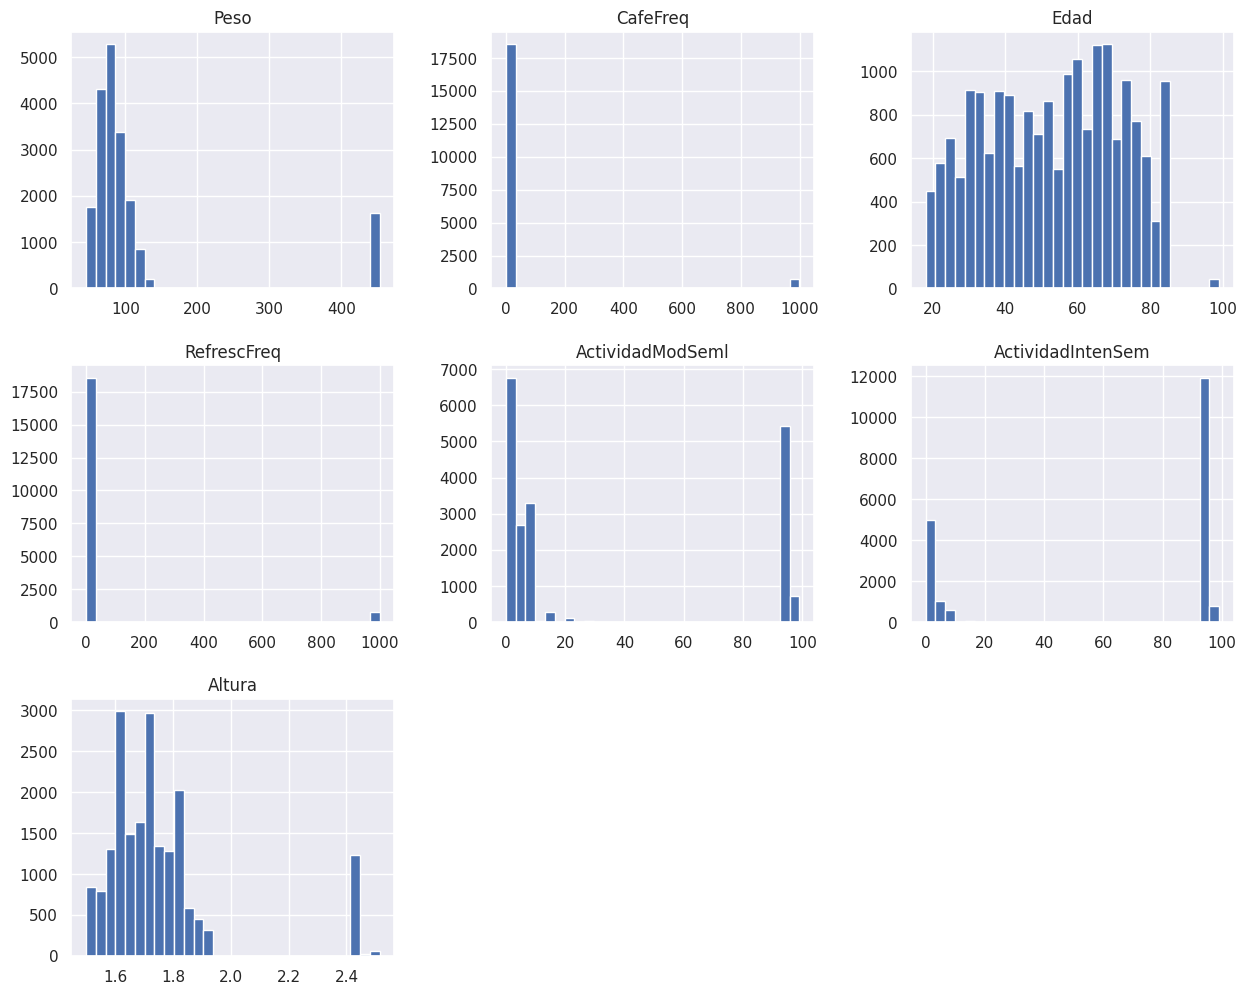

In [22]:
df_train[variables_numericas].hist(bins=30,figsize=(15,12))
plt.show()

## 6.3.  Tratamiento de valores atpicos.

### 6.3.1 Atributos numéricos

Empezamos por estadística que proporciona describe().

Los valores máximos de cada columna excepto Edad parecen atipicos:
*   Para la mayoria de las columnas según la documentación averigüé que hay valores codificados (por ejemplo para “frecuencia diaria de consumo de café” el valor 99 significa “sin respuesta”, o para “actividad física semanal” el valor 94 significa “nunca”. Casos “sin respuesta” reemplazamos por nulos, y “nunca” reemplazamos por 0. Para esto definimos la función “outliers_zero_nulo()
*   Algunas valores están fuera de rango lógico, por ejemplo  peso en la tabla tiene maximo de 453 kg y altura de 2,5 m. Utilizamos Rango Intercuartil (IQR) y estrategia de detección “Atípicos Extremos” para reemplazar outliers por valores nulos.



In [23]:
df_train[variables_numericas].describe()

,Peso,CafeFreq,Edad,RefrescFreq,ActividadModSeml,ActividadIntenSem,Altura
count,19333.000000,19333.000000,19333.000000,19333.000000,19333.000000,19333.000000,19333.000000
mean,111.772854,40.525423,53.029535,40.318212,32.904878,62.791341,1.744199
std,104.697240,191.509673,18.586860,192.058510,42.087998,43.520871,0.211179
min,45.359200,0.000000,18.000000,0.000000,0.000000,0.000000,1.498600
25%,68.038800,0.000000,37.000000,0.000000,3.000000,3.000000,1.625600
50%,81.646560,1.000000,54.000000,1.000000,7.000000,94.000000,1.701800
75%,97.522280,2.000000,68.000000,2.000000,94.000000,94.000000,1.778000
max,453.138408,999.000000,99.000000,999.000000,99.000000,99.000000,2.514600


Definimos la funcion para reemplazar casos codificados con numeros para “sin respuesta”  por nulos, y para “nunca” reemplazamos por 0.

In [24]:
def outliers_zero_nulo(column, valor_nulo, valor_0 = 1_000_000):
    df_train.loc[df_train[column] == valor_0, column] = 0
    df_train.loc[df_train[column] >= valor_nulo, column] = np.nan
    df_test.loc[df_test[column] == valor_0, column] = 0
    df_test.loc[df_test[column] >= valor_nulo, column] = np.nan

Realizamos reemplazo:

**ActividadModSeml, ActividadIntenSem** actividades fisicas semanales: valor 94 significa "nunca",reemplazamos por 0,  valores 95-99  "sin responder" reemplazamos por nulos

 **Edad** los codigos 97- 99  significan "sin responder"

**RefrescFreq, CafeFreq** frecuencia de consumo de refresco y cofe con azucar, valores a partir de 997 significan no hay informacion, los reemplazamos por nulos. No elimino valores usando rango intercuartilico aqui, porque para cada persona periodo de consumo es diferente(para parte de personas es al dia, para otros a la semana o mes). Crearemos nuevas columnas de consumo diario para hacer comprobaciones de atipicos mas adelante.

In [25]:
for column in ["ActividadModSeml", "ActividadIntenSem"]:
  outliers_zero_nulo(column,95,94)

outliers_zero_nulo("Edad",97)

for column in ["RefrescFreq","CafeFreq"]:
  outliers_zero_nulo(column,997)

Rezultado de transformacion:

In [26]:
df_train[variables_numericas].describe()

,Peso,CafeFreq,Edad,RefrescFreq,ActividadModSeml,ActividadIntenSem,Altura
count,19333.000000,18590.000000,19289.000000,18586.000000,18533.000000,18526.000000,19333.000000
mean,111.772854,2.257988,52.929027,1.827666,3.025036,0.943215,1.744199
std,104.697240,5.996775,18.488380,4.893424,3.378542,2.037201,0.211179
min,45.359200,0.000000,18.000000,0.000000,0.000000,0.000000,1.498600
25%,68.038800,0.000000,37.000000,0.000000,0.000000,0.000000,1.625600
50%,81.646560,1.000000,54.000000,0.000000,2.000000,0.000000,1.701800
75%,97.522280,2.000000,68.000000,2.000000,5.000000,1.000000,1.778000
max,453.138408,240.000000,85.000000,240.000000,28.000000,28.000000,2.514600


Definimos la funcion para aplicar Rango Intercuartil (IQR) y estrategia de detección “Atípicos Extremos”:

In [27]:
def outliers_IQR (df_train, df_test, column, coef):
  #calculamos IQR a partir de train
  Q1=df_train[column].quantile( 0.25)
  Q3=df_train[column].quantile(0.75)
  IQR = Q3 - Q1
  #aplicamos transformacion al train y a test
  mask_train = (df_train[column] < Q1 - coef * IQR) | (df_train[column] > Q3 + coef * IQR)
  mask_test = (df_test[column] < Q1 - coef * IQR) | (df_test[column] > Q3 + coef * IQR)
  df_train.loc[mask_train, column] = np.nan
  df_test.loc[mask_test, column] = np.nan

Reemplazamos “Atípicos Extremos” por valores nulos en las columnas **Peso**, **Altura**, **ActividadModSeml**,	**ActividadIntenSem**.

No aplicamos esta transformaciona **Edad** porque ya esta en rango logico y para **CafeFreq,RefrescFreq** porque es frequencia de consumo, pero periodo de consumo es diferente para cada registro. Mas adelante transformaremos las dos ultimas columnas a una nueva **new_BebidaAzucaDiaria** y comprobaremos attipicos ota vez.

In [28]:
for column in ["Peso","Altura","ActividadModSeml",	"ActividadIntenSem"]:
  outliers_IQR (df_train, df_test, column, 3)

Resultados de transformaciones:


In [29]:
df_train[variables_numericas].describe()

,Peso,CafeFreq,Edad,RefrescFreq,ActividadModSeml,ActividadIntenSem,Altura
count,17702.000000,18590.000000,19289.000000,18586.000000,18398.000000,17338.000000,18020.000000
mean,80.427150,2.257988,52.929027,1.827666,2.882215,0.531722,1.693351
std,18.005332,5.996775,18.488380,4.893424,2.939514,1.045072,0.098777
min,45.359200,0.000000,18.000000,0.000000,0.000000,0.000000,1.498600
25%,67.131616,0.000000,37.000000,0.000000,0.000000,0.000000,1.625600
50%,79.378600,1.000000,54.000000,0.000000,2.000000,0.000000,1.676400
75%,90.718400,2.000000,68.000000,2.000000,5.000000,1.000000,1.778000
max,135.624008,240.000000,85.000000,240.000000,20.000000,4.000000,1.930400


### 6.3.2 Atributos categoricos.

Variables categóricas en mi dataset están representadas con números. Según la documentación para todas ellas el código 7 significa "sin contestar", 8 “no está seguro" y 9  "desconocido". Vamos a reemplazar todos estos códigos por nulos explícitos utilizando función “outliers_zero_nulo()” definida anteriormente. El resto de valores esta dentro de rango lógico.

In [30]:
for column in variables_categoricas:
  outliers_zero_nulo(column, 7)

In [31]:
df_train[variables_categoricas].describe()

,Diabetis,Genero,UrbanRural,EstadoCivil,Raza,Hipertens,Colest,CansadoFreq,MalVistaFreq,EnfCoronaria,EnfBronquitCron,EnfInfarto,EnfCancer,EnfArtritis,EnfDepres,RefrescPeriod,CafePeriod
count,19333.000000,19331.000000,19333.000000,18517.000000,18296.000000,19311.000000,19283.000000,18873.000000,19328.000000,19291.000000,19324.000000,19317.000000,19325.000000,19310.000000,19316.000000,18586.000000,18590.000000
mean,0.106657,1.543066,2.319506,2.005886,1.384018,0.369841,0.315563,1.834843,1.206385,0.062620,0.056148,0.036600,0.122898,0.265199,0.185546,1.085656,0.847391
std,0.308685,0.498155,1.063313,0.966895,0.896560,0.482774,0.464752,0.753760,0.451264,0.242284,0.230213,0.187782,0.328328,0.441451,0.388750,1.229352,0.994472
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
max,1.000000,2.000000,4.000000,3.000000,6.000000,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000


## 6.4. Tratamiento de valores nulos

Calculamos cuantos valores nulos hay en cada columna utilizando propia función num_nulos() . Si porcentaje de nulos es más alto que 70% entonces vamos a eliminar la columna entera, porque no nos aportará mucho valor. Lo mismo realizamos para cada fila.

In [32]:
def num_nulos(data_frame, axis_n):
  num_nulos=data_frame.isnull().sum(axis = axis_n)
  perc_nulos=data_frame.isnull().mean(axis = axis_n)
  stats=pd.DataFrame({"num_nulos" : num_nulos,"%_nulos" : perc_nulos * 100}).sort_values("%_nulos",ascending=False)
  return stats.head(3)

Cantidad y % de nulos por filas en conjunto de entrenamiento:

In [33]:
num_nulos(df_train,1)

,num_nulos,%_nulos
24179,15,62.500000
15550,11,45.833333
9510,11,45.833333


Por filas en conjunto de prueba:

In [34]:
num_nulos(df_test,1)

,num_nulos,%_nulos
338,13,54.166667
19897,12,50.000000
2346,11,45.833333


Por columnas en conjunto de entrenamiento:

In [35]:
num_nulos(df_train,0)

,num_nulos,%_nulos
ActividadIntenSem,1995,10.319143
Peso,1631,8.436352
Altura,1313,6.791496


Por columnas en conjunto de prueba:

In [36]:
num_nulos(df_test,0)

,num_nulos,%_nulos
ActividadIntenSem,840,10.137581
Peso,691,8.339368
Altura,581,7.011827


**Conclusiones:** No hay ni columnas ni filas con porcentaje de nulos superior a  70%, entonces no vamos a eliminar ninguna fila o columna entera.

### 6.4.1  Variables categoricas. Imputacion de valores nulos.

Para variables categóricas sustituimos los nulos por valor más frecuente. Lo calculamos usando datos de train y despues aplicamos a train y a test. Convertimos la salida a DataFrame y recuperamos los nombres de columnas y indices.

In [37]:
imputer_cat = SimpleImputer(strategy="most_frequent")
df_train_imputed_cat = pd.DataFrame(imputer_cat.fit_transform(df_train[variables_categoricas]), columns=variables_categoricas,index=df_train[variables_categoricas].index)
df_test_imputed_cat = pd.DataFrame(imputer_cat.transform(df_test[variables_categoricas]), columns=variables_categoricas,index=df_test[variables_categoricas].index)

### 6.4.2  Variables numéricas. Imputacion de valores nulos.

Para las variables numéricas sustituimos los nulos por la mediana de la variable. La calculamos usando datos de train y despues aplicamos a train y a test.

In [38]:
imputer_num = SimpleImputer(strategy="median")
df_train_imputed_num = pd.DataFrame(imputer_num.fit_transform(df_train[variables_numericas]),columns = variables_numericas,index=df_train[variables_categoricas].index)
df_test_imputed_num = pd.DataFrame(imputer_num.transform(df_test[variables_numericas]),columns = variables_numericas,index=df_test[variables_categoricas].index)

Juntamos los partes categoricas y numericas transformados. Como resultado obtenemos conjunto de entrenamiento **df_train_imp** y de prueba **df_test_imp.**

In [39]:
df_train_imp = df_train_imputed_cat.join(df_train_imputed_num)
df_test_imp = df_test_imputed_cat.join(df_test_imputed_num)

Comprobamos cantidad de nulos despues de transformaciones.

In [40]:
num_nulos(df_train_imp,0)

,num_nulos,%_nulos
Diabetis,0,0.0
Genero,0,0.0
ActividadIntenSem,0,0.0


In [41]:
num_nulos(df_test_imp,0)

,num_nulos,%_nulos
Diabetis,0,0.0
Genero,0,0.0
ActividadIntenSem,0,0.0


**Conclusion:** todos los nulos han sido imputados con exito.

## 6.5 Tratamiento de valores duplicados

Comprobamos si hay filas duplicadas con duplicated() y si las hay entonces eliminamos.

In [42]:
df_train_imp[df_train_imp.duplicated(keep=False)]

,Diabetis,Genero,UrbanRural,EstadoCivil,Raza,Hipertens,Colest,CansadoFreq,MalVistaFreq,EnfCoronaria,...,EnfDepres,RefrescPeriod,CafePeriod,Peso,CafeFreq,Edad,RefrescFreq,ActividadModSeml,ActividadIntenSem,Altura


In [43]:
df_train_imp.drop_duplicates(inplace=True)

In [44]:
df_test_imp[df_test_imp.duplicated(keep=False)]

,Diabetis,Genero,UrbanRural,EstadoCivil,Raza,Hipertens,Colest,CansadoFreq,MalVistaFreq,EnfCoronaria,...,EnfDepres,RefrescPeriod,CafePeriod,Peso,CafeFreq,Edad,RefrescFreq,ActividadModSeml,ActividadIntenSem,Altura


No tenemos filas dublicadas

## 6.6 Análisis de correlación

Comprobamos las correlaciones utilizando una matriz de correlación y un mapa de calor. Optamos por utilizar el Coeficiente de **Correlación de Spearman**, porque la mayoría de los atributos son discretos u ordinales, y suponemos que la relación entre las variables no es estrictamente lineal. Aplicamos este paso antes de introducir nuevas columnas calculables, porque estarán correlacionadas con las columnas utilizadas en los cálculos.

In [45]:
corr=df_train_imp.corr(method="spearman")
high_corr=corr[corr.abs()>0.6]

In [46]:
#high_corr

**Correlación entre atributos:** La altura muestra una correlación de -0,7 con el género, y la frecuencia de consumo de café y soda depende del periodo de medición con coeficiente > 0.9. La primera no es crítica, mientras que la segunda la corregiremos al introducir una nueva columna que calculará el consumo diario.

**Correlación entre atributos y target**: dejamos presentes los atributos que tienen correlación débil, les evaluaremos con otros métodos mas adelante.


<Axes: >

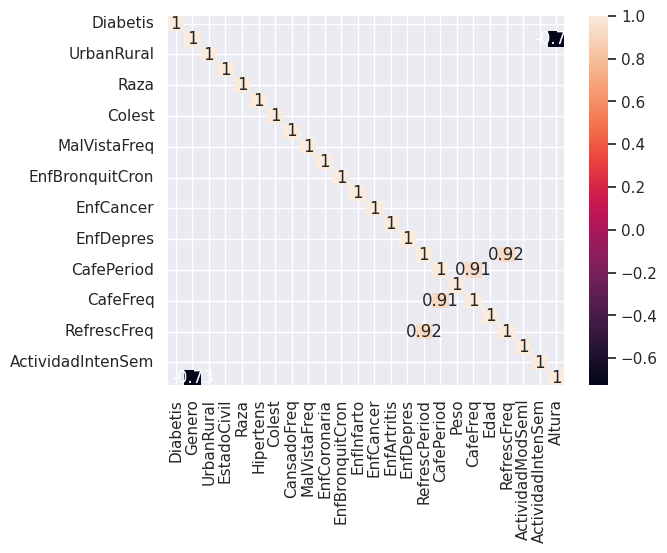

In [47]:
sns.heatmap(high_corr, annot=True)

## 6.7 Incorporación de nuevas columnas

Definimos la funcion para calcular consumo diario de bebidas azucaradas(frequencia de consumo en peridobo / periodo de medicion en dias), la usaremos para añadir nuevas columnas.

In [48]:
def frecuency_cal (df, column_freq, column_period):
  column_period_per_day=df[column_period].replace({2:7,3:30})
  new_column_name ="new_"+ column_period[:4]
  df.loc[df[column_period] == 0, new_column_name] = 0
  df.loc[df[column_period] != 0, new_column_name] = df[column_freq] / column_period_per_day

Nuevas columnas a incorporar al conjunto de train y test:
-	new_PesoAltura = Peso /Altura. El peso y altura por separado no son muy útiles, porque 80 kg para la persona de 180 cm es peso normal, pero para la persona de 160 cm es sobrepeso, y sabemos que personas con sobrepeso son más probables de tener enfermedades.
-	" new_EnfermedGraves" calculamos cantidad de enfermedades que tiene cada persona (usaremos las columnas cancer, depresión, artritis, etc.)
-	" new_BebidaAzucaDiaria " calculamos número total del consumo diario de bebidas azucaradas (refrescos y  café) . Ahora tenemos frecuencias para periodos diferentes para diferentes registros, algunos respondentes proporcinaban cifras para la semana, otros para el mes, etc.
-	new_ActividadDiaria – total de veces de actividad al día sumando actividad moderada y 2 * actividad intensiva. Multiplico por 2 porque se dice que media hora de correr equivale a una hora de caminar.


In [49]:
for df in [df_train_imp, df_test_imp]:
  #New_peso_altura
  df["new_PesoAltura"]=df["Peso"]/(df["Altura"]**2)

  #New_serious_disease
  serious_disease=["EnfCoronaria","EnfBronquitCron","EnfInfarto","EnfCancer","EnfArtritis","EnfDepres"]
  df["new_EnfermedGraves"]=df[df[serious_disease]==1].sum(axis=1)

  #New_shugar_drinks_per_day
  diet_related_columns=["RefrescFreq", "RefrescPeriod", "CafeFreq","CafePeriod"]
  for index in range(0,3,2):
    frecuency_cal(df, diet_related_columns[index], diet_related_columns[index + 1])
  df["new_BebidaAzucaDiaria"]=df[["new_Refr","new_Cafe"]].sum(axis=1)
  df.drop(["new_Refr","new_Cafe"], axis=1,inplace=True)

  #New_activity_per_day
  df["new_ActividadDiaria"] = (df["ActividadModSeml"] + df["ActividadIntenSem"] * 2)/7     #"ActividadModSeml" y "ActividadIntenSem" son veces por semana

Comprobamos valores atipicos en las nuevas columnas

In [50]:
new_columns=[col for col in df_train_imp.columns if "new" in col]
df_train_imp[new_columns].describe()

,new_PesoAltura,new_EnfermedGraves,new_BebidaAzucaDiaria,new_ActividadDiaria
count,19333.000000,19333.000000,19333.000000,19333.000000
mean,27.992353,0.728288,0.901283,0.541894
std,5.310059,0.971817,1.926562,0.549605
min,14.767255,0.000000,0.000000,0.000000
25%,24.210365,0.000000,0.000000,0.000000
50%,27.604061,0.000000,0.428571,0.428571
75%,30.896587,1.000000,1.047619,1.000000
max,52.730175,6.000000,60.000000,3.714286


Aplicamos metodo 3 IQR para la columna new_BebidaAzucaDiaria, porque anteriormente no pudimos aplicar esta comprobacion a sus componentes debido a diferencias en peridodos de medicion

In [51]:
column="new_BebidaAzucaDiaria"
outliers_IQR(df_train_imp, df_test_imp, column, 3)
max_Bebida=df_train_imp[column].max()
df_train_imp[column].fillna(max_Bebida,inplace=True)
df_test_imp[column].fillna(max_Bebida,inplace=True)

In [52]:
df_train_imp["new_BebidaAzucaDiaria"].describe()

count    19333.000000
mean         0.784715
std          0.990432
min          0.000000
25%          0.000000
50%          0.428571
75%          1.047619
max          4.142857
Name: new_BebidaAzucaDiaria, dtype: float64

## 6.8 Transformacion de Variables categóricas

La mayoría de  algoritmos de machine learning solo aceptan entradas numéricas, **Variables categóricas** en mi dataset ya estan codificados con numeros, comprobaremos cantidad de categorías para cada atributo utilizando nunique().

Si hay solo 2 valores únicos, entonces no hacemos nada. Para variables con más categorías, es necesario comprobar si tienen orden. La mayoría sí lo tiene, por ejemplo, "CansadoFreq" (estar cansado) tiene las siguientes categorías: 1 – nunca, 2 – algunos días, 3 – mayoría de los días, 4 – siempre. Estas variables no hace falta transformar.

La única variable nominal o sin orden es “Raza”, la transformamos con OneHotEncoder.

Cantidad de categorias por atributos categoricas:

In [53]:
df_train_imp[variables_categoricas].nunique().sort_values(ascending=False)

Raza               6
MalVistaFreq       4
RefrescPeriod      4
CansadoFreq        4
CafePeriod         4
UrbanRural         4
EstadoCivil        3
Hipertens          2
Colest             2
Genero             2
EnfCoronaria       2
EnfBronquitCron    2
EnfInfarto         2
EnfCancer          2
EnfArtritis        2
EnfDepres          2
Diabetis           2
dtype: int64

Aplicamos transformacion a la columna Raza para el conjunto de train y test.

In [54]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown = "ignore")
race_train = encoder.fit_transform(df_train_imp[["Raza"]])
race_test = encoder.transform(df_test_imp[["Raza"]])

Convertimos el output en DataFrame, añadimos datos transformados a los conjuntos de entrenamiento y de prueba, eliminamos la columna original "Raza" para evitar multicorrelacion.

In [55]:
def categ_transform(race_transformed, encoder, df):
  race_transformed_df = pd.DataFrame(race_transformed, columns=encoder.get_feature_names_out(), index = df.index)
  df_encoded = pd.concat([df, race_transformed_df,], axis=1)
  df_encoded.drop("Raza",axis=1,inplace=True)
  return df_encoded


Guardamos los datasets transformados en **df_train_encoded** y
**df_test_encoded**

In [56]:
df_train_encoded = categ_transform(race_train, encoder, df_train_imp)
df_test_encoded = categ_transform(race_test, encoder, df_test_imp)

In [57]:
df_train_encoded.head()

,Diabetis,Genero,UrbanRural,EstadoCivil,Hipertens,Colest,CansadoFreq,MalVistaFreq,EnfCoronaria,EnfBronquitCron,...,new_PesoAltura,new_EnfermedGraves,new_BebidaAzucaDiaria,new_ActividadDiaria,Raza_1.0,Raza_2.0,Raza_3.0,Raza_4.0,Raza_5.0,Raza_6.0
26683,0.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,...,26.452475,0.0,1.142857,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
27061,1.0,2.0,1.0,1.0,0.0,1.0,4.0,1.0,0.0,0.0,...,39.307325,1.0,2.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
374,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0,...,29.534510,3.0,1.000000,0.571429,0.0,1.0,0.0,0.0,0.0,0.0
18893,0.0,1.0,3.0,3.0,1.0,0.0,2.0,2.0,0.0,0.0,...,26.400959,0.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0
21316,0.0,2.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,0.0,...,28.245426,0.0,1.142857,1.000000,1.0,0.0,0.0,0.0,0.0,0.0


In [58]:
df_test_encoded.head()

,Diabetis,Genero,UrbanRural,EstadoCivil,Hipertens,Colest,CansadoFreq,MalVistaFreq,EnfCoronaria,EnfBronquitCron,...,new_PesoAltura,new_EnfermedGraves,new_BebidaAzucaDiaria,new_ActividadDiaria,Raza_1.0,Raza_2.0,Raza_3.0,Raza_4.0,Raza_5.0,Raza_6.0
9320,0.0,2.0,3.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,24.030679,0.0,1.000000,0.285714,1.0,0.0,0.0,0.0,0.0,0.0
5050,0.0,2.0,1.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,...,28.245426,0.0,4.142857,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
16814,0.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,28.289167,1.0,2.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0
25937,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,...,37.762495,0.0,1.428571,0.571429,0.0,1.0,0.0,0.0,0.0,0.0
2719,0.0,1.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,...,22.807169,0.0,1.000000,1.142857,1.0,0.0,0.0,0.0,0.0,0.0


## 6.9 Evaluaciones de transformaciones

Para evaluar como afectan mis transformaciones al rendimiento de modelo definimos dos funciones:
-	**cros_val_evaluation()** usa cross_validate() para dividir el conjunto de datos en varias partes y entrenar/evaluar el modelo  Random Forest  en diferentes subconjuntos, imprime accuracy, precisión, recall.
-	**train_test_evaluation()** entrena un modelo Random Forest utilizando el conjunto de entrenamiento y evalúa su rendimiento en los conjuntos de entrenamiento y prueba. Imprime la estadística.

En mi dataset los casos positivos corresponden a personas que tienen diabetes y es crucial identificar todos estos casos, por eso en evaluaciones vamos a dar alta prioridad a **recall.**


In [59]:
def cros_val_evaluation (X, y, n_estimators=300,max_depth=10):
  model = RandomForestClassifier(random_state=42,n_estimators = n_estimators, max_depth = max_depth)
  scoring =['accuracy','precision_macro', 'recall_macro']
  results = cross_validate(model, X, y, cv=5, scoring = scoring)
  accuracy = results['test_accuracy']
  precision = results['test_precision_macro']
  recall = results['test_recall_macro']
  print('accuracy ', accuracy, "avg. acc : ", sum(accuracy)/len(accuracy) )
  print('precision ', precision, "avg. pres : ", sum(precision)/len(precision))
  print("recall ", recall, "avg. pres : ", sum(recall)/len(recall))

In [60]:
def train_test_evaluation(X_train, y_train, X_test, y_test, n_estimators=300,max_depth=10):
  RF = RandomForestClassifier(random_state=42,n_estimators=n_estimators,max_depth=max_depth)
  RF = RF.fit(X_train, y_train)
  y_pred_RF = RF.predict(X_train)
  y_pred_RF_test = RF.predict(X_test)
  y_probs_rf = RF.predict_proba(X_test)[:, 1]
  auc_roc_rf = roc_auc_score(y_test, y_probs_rf)
  print("Conjunto de entrenamiento:")
  print("matriz de confusion:")
  print(confusion_matrix(y_train, y_pred_RF))
  print("")
  print(classification_report(y_train, y_pred_RF))
  print("Conjunto de prueba:")
  print("matriz de confusion:")
  print(confusion_matrix(y_test, y_pred_RF_test))
  print("")
  print("")
  print(classification_report(y_test, y_pred_RF_test))
  print("UOC conjunto de prueba:")
  print(auc_roc_rf)

Establecemos nivel base, para esto usando cross-validation evaluemos nuestras transformaciones hasta ahora. Estadística muestra que el recall es muy bajo, modelo no capta bien la diferencia entre clases, una de las razones puede ser desbalance de Clase.

In [61]:
cros_val_evaluation (df_train_encoded.drop(["Diabetis"],axis=1), df_train_encoded["Diabetis"])

accuracy  [0.89268167 0.89526765 0.89449185 0.8942059  0.8934299 ] avg. acc :  0.894015393628098
precision  [0.66781364 0.89762769 0.75752173 0.73369868 0.69753247] avg. pres :  0.7508388413300449
recall  [0.51132347 0.51075112 0.51458042 0.51326027 0.50855066] avg. pres :  0.5116931880828879


## 6.10 Balanceo de variable objetivo

En el conjunto de entrenamiento la mayor parte de personas no tienen diabetis, por eso concluimos que esta desbalanceado. Vamos a balancearlo  probando 3 técnicas: **submuestreo aleatorio**, **sobremuestreo SMOT** y **submuestreo RENN**, después comparamos el rendimiento y elegimos una. Rebalanceo solo se aplica al conjunto de datos de entrenamiento y es importante para que nuestro modelo pueda aprender suficiente de cada clase y no priorizar una sobre otra, o incluso predecir siempre que la persona no tiene diabetes.
  

<Axes: >

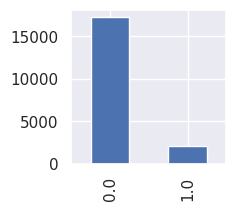

In [62]:
df_train_encoded["Diabetis"].value_counts().sort_index().plot.bar(figsize=(2, 2))

###6.10.1 Submuestreo aleatorio


El submuestreo o undersampling implica reducir el número de instancias de la clase mayoritaria para equilibrar las proporciones de las clases. Vamos a hacerlo de manera aleatoria porque esto ayuda a evitar sesgos.

In [63]:
class_minority = df_train_encoded[df_train_encoded["Diabetis"]==1].copy()
class_majority = df_train_encoded[df_train_encoded["Diabetis"]==0].copy()
class_majority_downsampled = class_majority.sample(
                                     n=len(class_minority),  # Igualar al número de registros de clase minoritaria
                                     random_state=42)
df_train_balanced=pd.concat([class_majority_downsampled, class_minority])

El resultado: dataset **df_train_balanced** esta balanceado aunque hemos perdido parte de registros que equivale a parte de informacion valiosa. Ahora cada clase contiene aprox 2000 registros.

<Axes: >

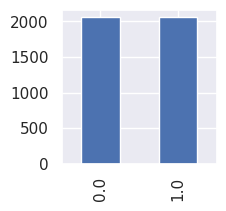

In [64]:
df_train_balanced["Diabetis"].value_counts().sort_index().plot.bar(figsize=(2, 2))

Subdividimos el conjunto de entrenamiento balanceado (df_train_balanced) en conjuntos de atributos (X_train_bal) y target (y_train_bal). Realizamos una subdivisión similar para el conjunto de prueba  (df_train_encoded), generando conjuntos de atributos (X_test_no_bal) y target (y_test_no_bal)."

In [65]:
X_train_bal = df_train_balanced.drop(["Diabetis"],axis=1)
y_train_bal = df_train_balanced["Diabetis"]
X_test_no_bal = df_train_encoded.drop(["Diabetis"],axis=1)
y_test_no_bal = df_train_encoded["Diabetis"]

Usando cross-validation evaluemos resultado de balanceo, recall ha subido de 0.5 aprox hasta 0.74 y es un buen resultado

In [66]:
cros_val_evaluation (X_train_bal, y_train_bal)

accuracy  [0.75272727 0.72363636 0.75393939 0.73939394 0.73543689] avg. acc :  0.7410267725801706
precision  [0.75425622 0.72725427 0.75757576 0.74075158 0.73623853] avg. pres :  0.7432152734578612
recall  [0.75277393 0.72371236 0.75386704 0.73934801 0.73543689] avg. pres :  0.7410276452196808


###6.10.2 Sobremuestreo SMOT

SMOTE genera de manera sintética ejemplos adicionales de la clase minoritaria en lugar de simplemente duplicar ejemplos existentes. Esto evita perdida de información que sufrimos durante submuestreo, pero añade más ruido al modelo.

In [67]:
smt = SMOTE(sampling_strategy='auto', random_state=42)

X_train_samp=df_train_encoded.drop("Diabetis",axis=1)
y_train_samp= df_train_encoded["Diabetis"]

X_res_SMOTE, y_res_SMOTE = smt.fit_resample(X_train_samp, y_train_samp)

Resultado: **X_res, y_res** estan balanceados utilizando SMOT y cada clase contiene mas de 15 000 registros.

<Axes: >

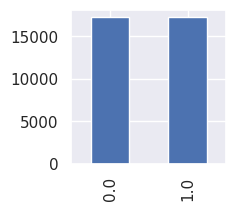

In [68]:
y_res_SMOTE.value_counts().sort_index().plot.bar(figsize=(2, 2))

### 6.10.3 Submuestreo RENN

"RepeatedEditedNearestNeighbours" (RENN) es modelo iterativo basado en el algoritmo de los "Vecinos más cercanos" para eliminar ejemplos de la clase mayoritaria que se consideran ruido o atípicos. Depues de este tratamiento, aunque cantidad de registros sin diabetis se ha disminuida, los clase sigen desbalanceados.

In [69]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
renn = RepeatedEditedNearestNeighbours()
X_res_RENN, y_res_RENN=renn.fit_resample(X_train_samp, y_train_samp) # los mismos datos que para SMOT y submustreo aleatorio


<Axes: >

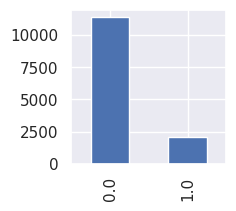

In [70]:
y_res_RENN.value_counts().sort_index().plot.bar(figsize=(2, 2))

### 6.10.3. Comparación de resultados y elección del método

No podemos usar cross validation para SMOT, porque da demaciado buenas resultados con datos sinteticos y no son fiables:

In [71]:
cros_val_evaluation (X_res_SMOTE, y_res_SMOTE)

accuracy  [0.74714141 0.9555652  0.95787493 0.95440069 0.95251882] avg. acc :  0.9135002111576561
precision  [0.80581098 0.95787254 0.9597915  0.95669852 0.95517798] avg. pres :  0.9270703034249228
recall  [0.74710971 0.95556007 0.95787493 0.95440069 0.95251882] avg. pres :  0.9134928441363315


No tenemos conjunto de validacion, pero como excepción vamos a crearlo solo para esta tarea usando parte de test (2 000 registros de 8 500). Así compararemos resultados de dos métodos de balanceo entrenando modelos con train y evaluando en train y validation set.

In [72]:
X_val=df_test_encoded.drop("Diabetis",axis=1).iloc[ :2000]
y_val= df_test_encoded["Diabetis"].iloc[ :2000]

**Submuestreo aleatorio.** Resultados:

In [73]:
train_test_evaluation(X_train_bal, y_train_bal, X_val, y_val)

Conjunto de entrenamiento:
matriz de confusion:
[[1756  306]
 [ 147 1915]]

              precision    recall  f1-score   support

         0.0       0.92      0.85      0.89      2062
         1.0       0.86      0.93      0.89      2062

    accuracy                           0.89      4124
   macro avg       0.89      0.89      0.89      4124
weighted avg       0.89      0.89      0.89      4124

Conjunto de prueba:
matriz de confusion:
[[1277  488]
 [  54  181]]


              precision    recall  f1-score   support

         0.0       0.96      0.72      0.82      1765
         1.0       0.27      0.77      0.40       235

    accuracy                           0.73      2000
   macro avg       0.61      0.75      0.61      2000
weighted avg       0.88      0.73      0.78      2000

UOC conjunto de prueba:
0.8217057440781147


**Sobremuestreo SMOT**. Resultados:

In [74]:
train_test_evaluation(X_res_SMOTE, y_res_SMOTE, X_val, y_val)

Conjunto de entrenamiento:
matriz de confusion:
[[16247  1024]
 [ 1190 16081]]

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94     17271
         1.0       0.94      0.93      0.94     17271

    accuracy                           0.94     34542
   macro avg       0.94      0.94      0.94     34542
weighted avg       0.94      0.94      0.94     34542

Conjunto de prueba:
matriz de confusion:
[[1647  118]
 [ 155   80]]


              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      1765
         1.0       0.40      0.34      0.37       235

    accuracy                           0.86      2000
   macro avg       0.66      0.64      0.65      2000
weighted avg       0.85      0.86      0.86      2000

UOC conjunto de prueba:
0.8088867458260502


**Submustreo RENN**:

In [75]:
train_test_evaluation(X_res_RENN, y_res_RENN, X_val, y_val)

Conjunto de entrenamiento:
matriz de confusion:
[[11308    92]
 [  765  1297]]

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     11400
         1.0       0.93      0.63      0.75      2062

    accuracy                           0.94     13462
   macro avg       0.94      0.81      0.86     13462
weighted avg       0.94      0.94      0.93     13462

Conjunto de prueba:
matriz de confusion:
[[1584  181]
 [ 123  112]]


              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91      1765
         1.0       0.38      0.48      0.42       235

    accuracy                           0.85      2000
   macro avg       0.66      0.69      0.67      2000
weighted avg       0.86      0.85      0.86      2000

UOC conjunto de prueba:
0.8261105418600446


**Conclusion:** En mi caso la etiqueta 1 del target corresponde a personas que tienen diabetes y es crucial identificar todos estos casos (alta prioridad en recall para clase 1), el método de submuestreo aleatorio parece ser más adecuado en este contexto.

## 6.12 Reducción de la dimensionalidad

Conjuntos de datos despues de elegir submuestreo aleatorio:

In [76]:
print(X_train_bal.shape)
print(y_train_bal.shape)
print(X_test_no_bal.shape)
print(y_test_no_bal.shape)

(4124, 32)
(4124,)
(19333, 32)
(19333,)


### 6.12.1 Filas

Mi conjunto de datos, después de ser balanceado, es relativamente pequeño, con alrededor de 4,000 registros. Cada registro representa una observación única e independiente. En este caso, no se recomienda la reducción adicional de filas, ya que ello provocaría la pérdida de información valiosa.

### 6.12.2 Columnas

La presencia de demasiados atributos, especialmente si son irrelevantes o redundantes, puede llevar a un sobreajuste y aumentar la complejidad computacional. Vamos a usar diferentes tecnicas para  identificar y retener solo los atributos más relevantes.  Realizamos este paso después del balanceo para permitir que la importancia de las características se evalúe en un conjunto de datos balanceado, reflejando así el impacto de las características en ambas clases de manera equitativa.

#### Correlacion entre atributos y target

Calculamos la correlación entre el objetivo 'Diabetes' y los atributos. Observamos que las columnas creadas anteriormente(new_EnfermedGraves, new PesoAltura,new_ActividadDiaria etc) presentan una correlación más alta con el objetivo que las columnas utilizadas en su cálculo. Con el fin de evitar la multicolinealidad, eliminamos las columnas que fueron utilizadas en el cálculo

In [77]:
X_train_bal.join(y_train_bal).corr(method="spearman")["Diabetis"].abs().sort_values(ascending=False)

Diabetis                 1.000000
Hipertens                0.428985
Colest                   0.372699
Edad                     0.344202
new_EnfermedGraves       0.298763
EnfArtritis              0.250564
new_PesoAltura           0.249214
new_ActividadDiaria      0.218239
ActividadIntenSem        0.207604
Peso                     0.196280
ActividadModSeml         0.184492
EnfCoronaria             0.182977
EnfInfarto               0.150367
MalVistaFreq             0.135028
RefrescPeriod            0.133154
RefrescFreq              0.126999
new_BebidaAzucaDiaria    0.123568
EnfBronquitCron          0.108140
CafePeriod               0.107633
CafeFreq                 0.103932
EnfDepres                0.100999
EnfCancer                0.094130
CansadoFreq              0.086984
UrbanRural               0.080958
Raza_2.0                 0.073286
Raza_1.0                 0.045855
Raza_6.0                 0.032570
EstadoCivil              0.030424
Altura                   0.029002
Raza_4.0      

Eliminacion segun descrito arriba:

In [78]:
X_train_red =X_train_bal.drop(["Peso", "Altura", "EnfCoronaria","EnfBronquitCron","EnfInfarto","EnfCancer","EnfArtritis","EnfDepres", "RefrescFreq", "RefrescPeriod", "CafeFreq","CafePeriod","ActividadModSeml","ActividadIntenSem"],axis=1)
X_test_red =X_test_no_bal.drop(["Peso", "Altura", "EnfCoronaria","EnfBronquitCron","EnfInfarto","EnfCancer","EnfArtritis","EnfDepres", "RefrescFreq", "RefrescPeriod", "CafeFreq","CafePeriod","ActividadModSeml","ActividadIntenSem"],axis=1)
# y guardamos target con nombres similares
y_train_red = y_train_bal.copy()
y_test_red =y_test_no_bal.copy()

#### Variables con Baja Varianza

La varianza mide la dispersión de los valores de una variable. Si una variable apenas cambia a lo largo de las observaciones, puede no ser útil para predecir o modelar la relación entre las variables. Segun lo visto Raza_2,Raza_3,... Raza_6 son relativamente constantes o poco variables, podriamos considerar su eliminacion, pero hay que hacer pruebas adicionales.

In [79]:
sel_var = VarianceThreshold(threshold=0.15)  # #Removing both constant and quasi-constant
X_sel_var = sel_var.fit(X_train_red)
for score,columns in zip(X_sel_var.get_support(),X_train_red.columns):
  print (score, columns)

True Genero
True UrbanRural
True EstadoCivil
True Hipertens
True Colest
True CansadoFreq
True MalVistaFreq
True Edad
True new_PesoAltura
True new_EnfermedGraves
True new_BebidaAzucaDiaria
True new_ActividadDiaria
True Raza_1.0
False Raza_2.0
False Raza_3.0
False Raza_4.0
False Raza_5.0
False Raza_6.0


#### Pruebas Estadísticas Univariadas. Chi cuadrado.

La selección de variables esta basada en la prueba de chi-cuadrado, ayuda a determinar si existe una asociación significativa entre  variables categóricas y target categorico.  Genero, EstadoCivil y Raza_n. tienen peor puntuacion chi2, lo mismo hemos visto en la prueba de correlacion y varianza. Procedemos a su eliminacion.

In [80]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

sel_chi2 = SelectKBest(chi2)
X_sel_chi2 =sel_chi2.fit(X_train_red,y_train_red)
scores= X_sel_chi2.scores_
for column,label in zip(X_sel_chi2.scores_,X_train_red.columns):
  print (column,label)

0.05752988047808765 Genero
13.091317671092952 UrbanRural
1.619823173569102 EstadoCivil
345.4210057854918 Hipertens
304.3398861872737 Colest
13.922270519048837 CansadoFreq
16.825312618416067 MalVistaFreq
2801.5670267824903 Edad
240.6431539571334 new_PesoAltura
431.38135383089514 new_EnfermedGraves
24.74768256980915 new_BebidaAzucaDiaria
103.98333600555807 new_ActividadDiaria
1.9533646322378717 Raza_1.0
19.109540636042404 Raza_2.0
1.2857142857142858 Raza_3.0
1.6842105263157894 Raza_4.0
0.11764705882352941 Raza_5.0
4.333333333333333 Raza_6.0


In [81]:
X_train_red.drop(["Raza_1.0","Raza_3.0","Raza_4.0","Raza_5.0","Raza_6.0","EstadoCivil","Genero"],axis=1, inplace=True)
X_test_red.drop(["Raza_1.0","Raza_3.0","Raza_4.0","Raza_5.0","Raza_6.0","EstadoCivil","Genero"],axis=1, inplace=True)

## 6.13. Estandarizacion

Transformamos las variables numericas con StandartScaler para que tengan una media de cero y una desviación estándar de uno. Es una buena práctica para asegurar que las características estén en la misma escala, lo que facilita el entrenamiento y mejora la estabilidad y el rendimiento del modelo

In [82]:
#actualizamos listado de variables
var_numer=["Edad","new_PesoAltura","new_BebidaAzucaDiaria", "new_ActividadDiaria"]
var_categor= list(set(X_train_red.columns)- set(var_numer))

In [83]:
#estandartizamos variables numericas, convertimos el resultado al DataFrame
scaler = StandardScaler()
X_train_sc_num = pd.DataFrame(scaler.fit_transform(X_train_red[var_numer]),columns=var_numer,index=X_train_red.index)
X_test_sc_num  = pd.DataFrame(scaler.transform(X_test_red[var_numer]),columns=var_numer,index=X_test_red.index)

#juntamos variables numericas estandartizadas con variables categoricas
X_train_scailed = X_train_sc_num.join(X_train_red[var_categor])
X_test_scailed = X_test_sc_num.join(X_test_red[var_categor])

y_train = y_train_red.copy() # y permanece sin cambios
y_test = y_test_red.copy()

##6.14 PCA para representacion grafica

Probamos análisis de componentes principales (PCA) para reducir la dimensionalidad de  datos a 2 componentes principales. Vemos que el 39.38% de la varianza original de los datos puede ser explicado por estas dos nuevas variables.

In [84]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scailed)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.2524125  0.14137148]
0.3937839753665097


Solo vamos a usar PCA para mostrar el grafico, pero no para reducion, porque perderiamos parte significativa de explicacion de varianza. En el grafico se ve que no hay ninguna linea de separacion clara para las n_components=2, las clases se superponen mucho

<Axes: xlabel='PC1', ylabel='PC2'>

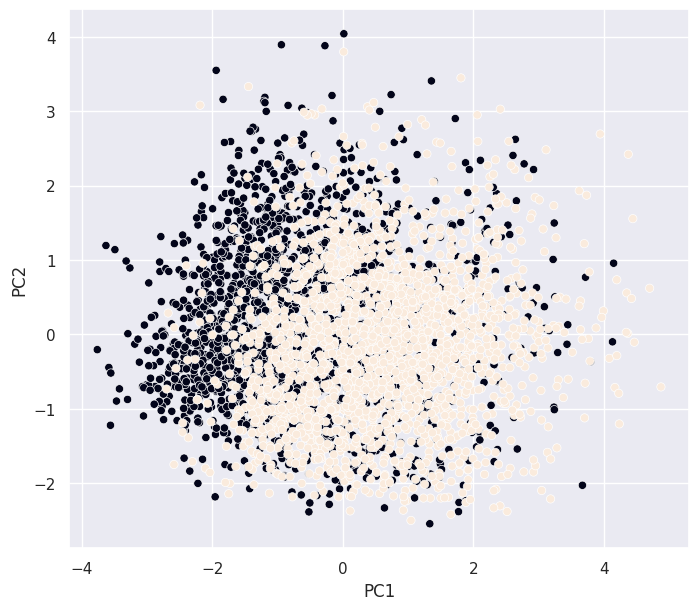

In [85]:
pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y_train.values

plt.figure(figsize=(8, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', c=y_train)

## 6.15 Análisis de distribuciones/frequencias

Realizamos analisis univariantes despues de todas las transformaciones para asegurarnos que se aplicó correctamente y comprobar las distribuciones

6.13.1 Variables categoricas

*   "UrbanRural", "Hipertens", "Colest" tienen frecuensia de categorias mas o menos uniforme.
*   El resto de atributos tienen una o varias categorías que predominen de manera significativa sobre las demás.




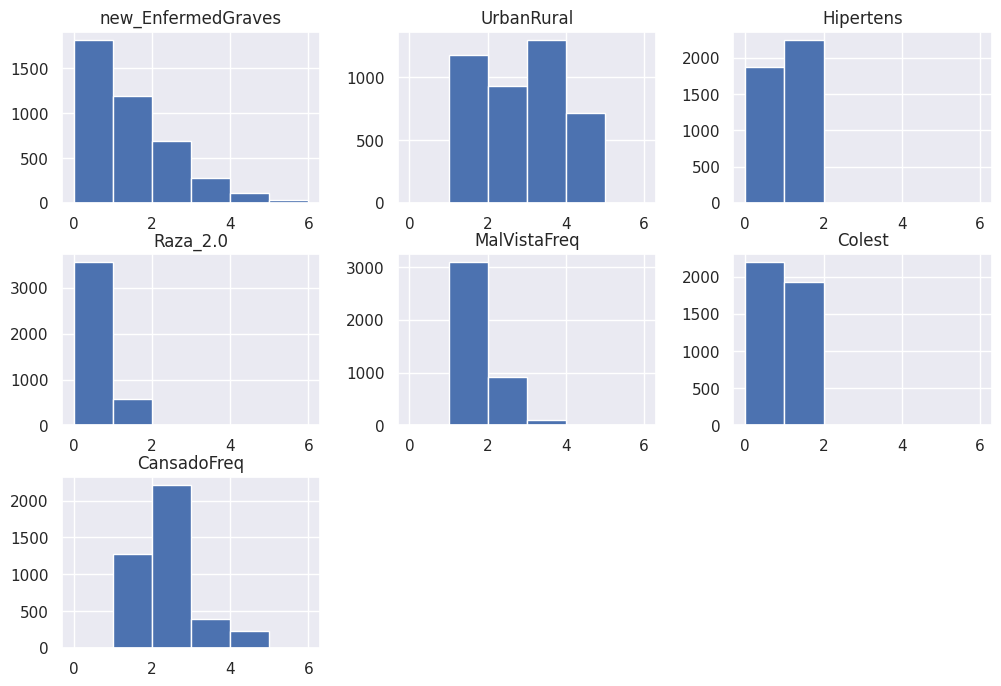

In [86]:
binwidth=1
X_train_scailed[var_categor].hist(bins=np.arange(min(X_train_scailed[var_categor].min()), max(X_train_scailed[var_categor].max()) + binwidth, binwidth),figsize=(12,8))
plt.show()

6.13.2 Variables numericas

*   "new_PesoAltura" tiene distribución casi normal,
*   "Edad" - distribucion sesgada
*   "new_BebidaAzucaDiaria" y  "new_ActividadDiaria" parece mas a distribución exponencial.

**Conclusion:** en mi caso porque distribuiciones son diferentes entonces voy a aplicar algoritmos que son menos sensibles a la distribución, como por ejemplo bosques aleatorios. Esto nos permite evitar transformaciones logaritmicas y no meter mas ruido.





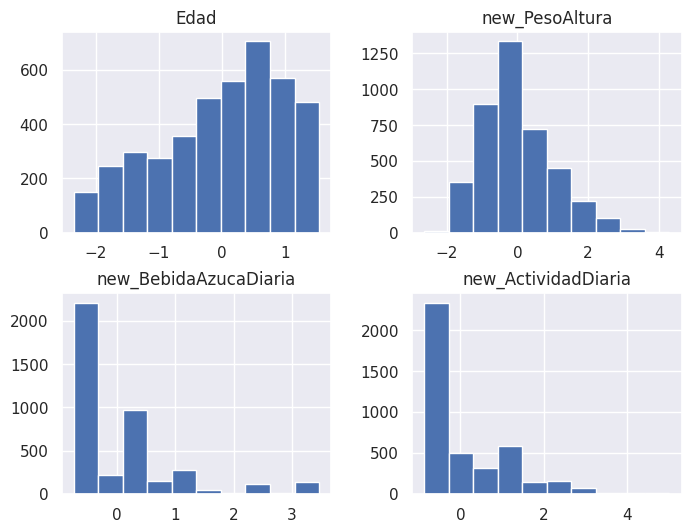

In [87]:
X_train_scailed[var_numer].hist(figsize=(8,6))
plt.show()

6.13.2 Target

Target despues de todas transformaciones sigue balanceada.

<Axes: >

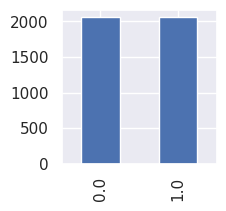

In [88]:
y_train.value_counts().plot.bar(figsize=(2,2))

# 7. Opcional: Comprobación de generalización (aprendizaje supervisado + validación)

Comprobamos las dimenciones de datasets despues de todas transformaciones:

In [89]:
X_train=X_train_scailed.copy()
X_test=X_test_scailed.copy()

In [90]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4124, 11)
(19333, 11)
(4124,)
(19333,)


In [91]:
train_test_evaluation(X_train, y_train, X_test, y_test)

Conjunto de entrenamiento:
matriz de confusion:
[[1752  310]
 [ 151 1911]]

              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88      2062
         1.0       0.86      0.93      0.89      2062

    accuracy                           0.89      4124
   macro avg       0.89      0.89      0.89      4124
weighted avg       0.89      0.89      0.89      4124

Conjunto de prueba:
matriz de confusion:
[[12599  4672]
 [  151  1911]]


              precision    recall  f1-score   support

         0.0       0.99      0.73      0.84     17271
         1.0       0.29      0.93      0.44      2062

    accuracy                           0.75     19333
   macro avg       0.64      0.83      0.64     19333
weighted avg       0.91      0.75      0.80     19333

UOC conjunto de prueba:
0.9071602397362611


**Conclusion:** Despues de preprocesamiento realizado hemos subido el Recall de 0.79 hasta 0.94 pero Precision sigue siendo bastante bajo, esto significa 2 posibles problemas: o datos son "malos" o modelo,  y requiere mas investigacion.